# Working with Multiclass classification (larger example, more than 2 different classes)

To practice multi - class classification, we're going to build a neural network to classify images of different items of clothing

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()


4422102/4422102 [==============================] - 0s 0us/step


In [2]:
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label:\n{train_labels[0]}\n")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [3]:
train_data[0].shape, train_labels[0].shape

((28, 28), ())

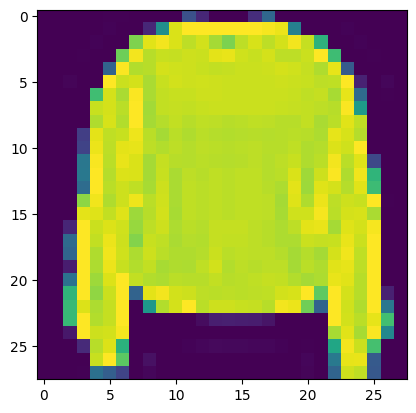

In [4]:
# Plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[7])

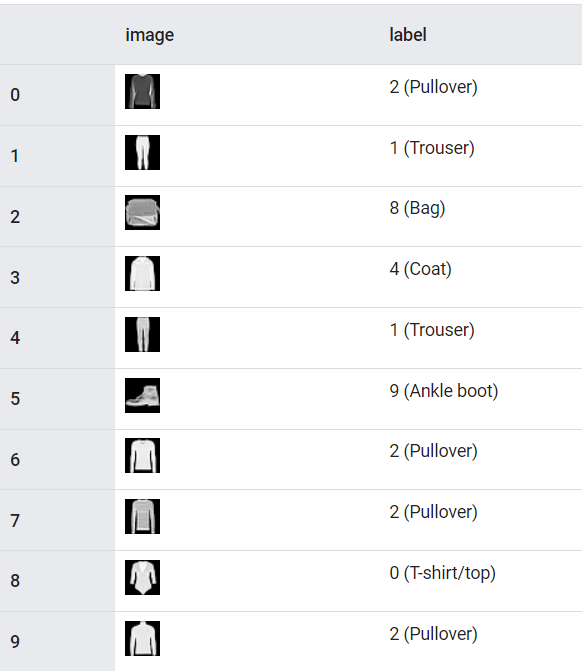

In [5]:
class_names = ["T_shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
len(class_names)
# 10 so its multiclass

10

Text(0.5, 1.0, 'Coat')

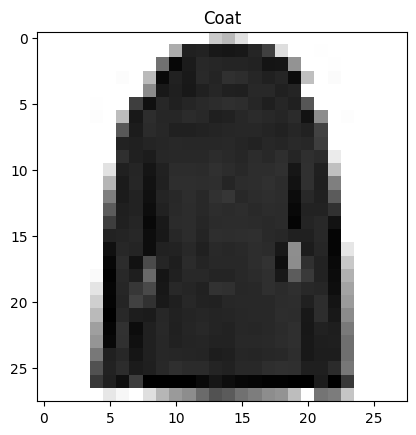

In [6]:
index_of_choice = 2000
plt.imshow(train_data[index_of_choice],cmap = plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

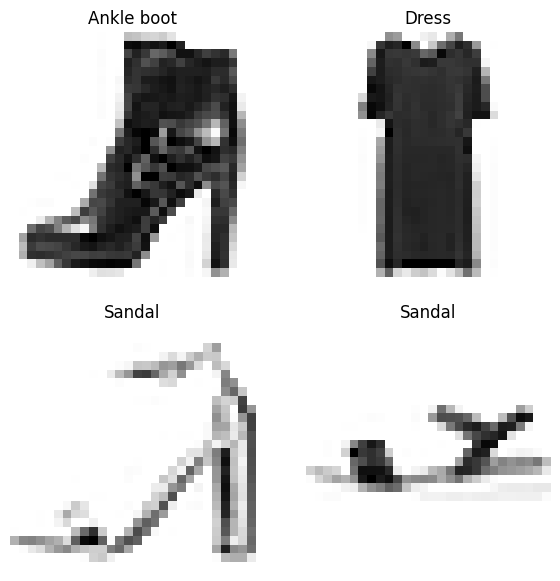

In [7]:
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize =(7,7))
for i in range(4):
  ax = plt.subplot(2,2,i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index],cmap = plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

# Bulding a multiclass classification model
we can use a similar architecture to out binary classifiers, however, we're going to have to tweak a few things:
* Input shape = 28 x 28 (shape of one image)
* Output shape = 10 (one per class of clothing)
* Loss function = CategoricalCrossentropy()

   -> **Note:** If your labels are one hot encoded, use CategoricalCrossentropy(). If your labels are integer form use SparseCategoricalCrossentropy()

* Output layer activation = Softmax (not sigmoid)


In [8]:
tf.one_hot(train_labels[:10],depth=10)

<tf.Tensor: shape=(10, 10), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)>

In [9]:
tf.random.set_seed(42)

model_11 = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                tf.keras.layers.Dense(4, activation = "relu"),
                                tf.keras.layers.Dense(4, activation = "relu"),
                                tf.keras.layers.Dense(10, activation = "softmax")])

model_11.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

his = model_11.fit(train_data,
                   tf.one_hot(train_labels,depth=10),
                   epochs = 10,
                   validation_data=(test_data, tf.one_hot(test_labels,depth=10)))


Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3216 - accuracy: 0.0986 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0986 - val_loss: 2.3028 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3027 - accuracy: 0.1002 - val_loss: 2.3028 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0975 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0973 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0992 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3027 - val_accuracy:

In [10]:
train_data.min(), train_data.max()

(0, 255)

Neural network prefer data to be scaled (or normalized), this means they like to have the numbers in the tensors they try to find pattern between 0 & 1

In [11]:
# We can get our training and testing data between 0 & 1 by dividng by the maximum
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0
train_data_norm.min(), test_data_norm.max()

(0.0, 1.0)

<Axes: title={'center': 'Non_normalized data'}>

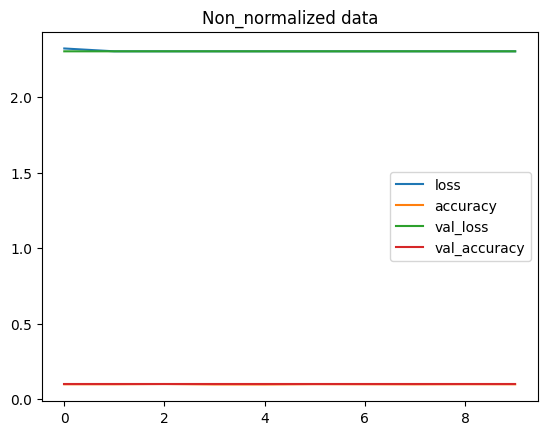

In [12]:
import pandas as pd
# Plot non-normalized data loss curves
pd.DataFrame(his.history).plot(title = "Non_normalized data")

# Evaluating our multi class classification model
we could:
* Evaluate its performance using other classification metrics (such as confusion matrix)
* Assess some of its predictions (through visualizations)
* Improve its results (by traiming it for longer or changing the architecure)
* Save and export it for use in an application

Let's go through top 2


In [13]:
import itertools
from sklearn.metrics import confusion_matrix
import numpy as np

def make_cm(y_true, y_pred, classes=None, figsize=(10,10), text_size=15):
  cm = confusion_matrix(y_true,tf.round(y_pred))
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] #normalize cm
  n_classes = cm.shape[0]

  # Let's prettify it
  fig,ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm,cmap=plt.cm.Blues)
  fig.colorbar(cax)

  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  ax.set(title = "Confusion matrix",
        xlabel = "Predicted Label",
        ylabel=  "True Label",
        xticks = np.arange(n_classes),
        yticks = np.arange(n_classes),
        xticklabels = labels,
        yticklabels = labels)

  threshold = (cm.max() + cm.min()) / 2

  for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i,f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
            horizontalalignment="center",
            color ="white" if cm[i,j]>threshold else"black",
            size = 15)